In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv(r"C:\Users\Lenovo\Documents\UM\Semester 1\Research Project\DSDM-Research-1\cgm_data.csv",index_col=0)

In [34]:
data

,Participant,Period,Place,Sleep,Timestamp,Sensor Glucose (mmol/L),Center,CIW_day
1,c2432fa3,CIW1,clinic,WAKE,7/17/2018 18:17,4.2,UM,1
2,c2432fa3,CIW1,clinic,WAKE,7/17/2018 18:22,4.2,UM,1
3,c2432fa3,CIW1,clinic,WAKE,7/17/2018 18:27,4.2,UM,1
4,c2432fa3,CIW1,clinic,WAKE,7/17/2018 18:32,4.3,UM,1
5,c2432fa3,CIW1,clinic,WAKE,7/17/2018 18:37,4.3,UM,1
...,...,...,...,...,...,...,...,...
646487,b86ce95a,CIW1,clinic,WAKE,8/16/2021 12:55,6.8,WUR,6
646488,b86ce95a,CIW1,clinic,WAKE,8/16/2021 13:00,7.0,WUR,6
646489,b86ce95a,CIW1,clinic,WAKE,8/16/2021 13:05,7.2,WUR,6
646490,b86ce95a,CIW1,clinic,WAKE,8/16/2021 13:10,7.1,WUR,6


In [35]:
print(data.dtypes)

Participant                 object
Period                      object
Place                       object
Sleep                       object
Timestamp                   object
Sensor Glucose (mmol/L)    float64
Center                      object
CIW_day                      int64
dtype: object


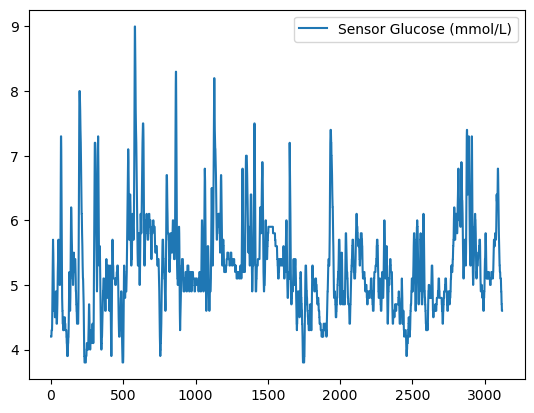

In [40]:
series = data[['Timestamp','Sensor Glucose (mmol/L)','Participant']]
limittest = series.loc[series['Participant'] =='c2432fa3']
limittest.plot()
plt.show()

In [46]:
series['Participant'] = pd.Categorical(series['Participant'])
series['code'] = series['Participant'].cat.codes
series

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25892\327056869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['Participant'] = pd.Categorical(series['Participant'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25892\327056869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['code'] = series['Participant'].cat.codes


,Timestamp,Sensor Glucose (mmol/L),Participant,code
1,7/17/2018 18:17,4.2,c2432fa3,181
2,7/17/2018 18:22,4.2,c2432fa3,181
3,7/17/2018 18:27,4.2,c2432fa3,181
4,7/17/2018 18:32,4.3,c2432fa3,181
5,7/17/2018 18:37,4.3,c2432fa3,181
...,...,...,...,...
646487,8/16/2021 12:55,6.8,b86ce95a,172
646488,8/16/2021 13:00,7.0,b86ce95a,172
646489,8/16/2021 13:05,7.2,b86ce95a,172
646490,8/16/2021 13:10,7.1,b86ce95a,172


In [47]:
from collections import Counter
counter_object = Counter(series['Participant'])
keys = counter_object.keys()
num_values = len(keys)
num_values

239

In [48]:
series['code'].describe()

count    646491.000000
mean        119.462498
std          69.351734
min           0.000000
25%          59.000000
50%         120.000000
75%         180.000000
max         238.000000
Name: code, dtype: float64

In [58]:
filtered = series.loc[series['code']==238]

In [59]:
filtered

,Timestamp,Sensor Glucose (mmol/L),Participant,code
438273,9/18/2019 9:57,6.9,ffcd67d2,238
438274,9/18/2019 10:02,6.8,ffcd67d2,238
438275,9/18/2019 10:07,6.8,ffcd67d2,238
438276,9/18/2019 10:12,6.6,ffcd67d2,238
438277,9/18/2019 10:17,6.4,ffcd67d2,238
...,...,...,...,...
441248,12/16/2019 13:44,4.7,ffcd67d2,238
441249,12/16/2019 13:49,4.6,ffcd67d2,238
441250,12/16/2019 13:54,4.6,ffcd67d2,238
441251,12/16/2019 13:59,4.5,ffcd67d2,238


In [71]:
datasets = []
lengths = []

In [72]:
for i in range(0,239):
    filtered = series.loc[series['code'] == i]
    datasets.append(filtered)
    lengths.append(len(filtered))

In [69]:
datasets[154]

,Timestamp,Sensor Glucose (mmol/L),Participant,code
225518,12/3/2020 13:46,7.3,a559067b,154
225519,12/3/2020 13:51,7.3,a559067b,154
225520,12/3/2020 13:56,7.3,a559067b,154
225521,12/3/2020 14:01,7.4,a559067b,154
225522,12/3/2020 14:06,7.4,a559067b,154
...,...,...,...,...
228360,3/2/2021 12:57,5.4,a559067b,154
228361,3/2/2021 13:02,5.3,a559067b,154
228362,3/2/2021 13:07,5.3,a559067b,154
228363,3/2/2021 13:12,5.3,a559067b,154


(array([  2.,   2.,  22.,   9.,   7.,   5., 108.,  71.,  11.,   2.]),
 array([ 598. ,  934.2, 1270.4, 1606.6, 1942.8, 2279. , 2615.2, 2951.4,
        3287.6, 3623.8, 3960. ]),
 <BarContainer object of 10 artists>)

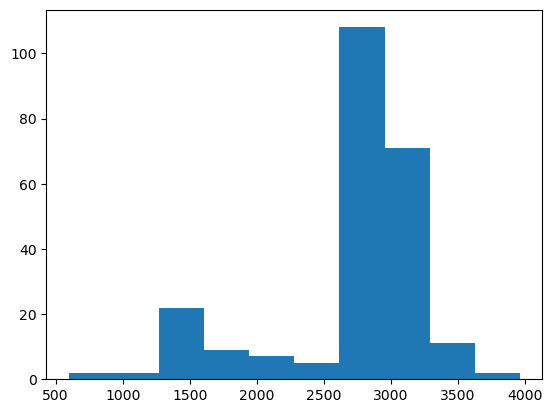

In [76]:
lengths = np.asarray(lengths)
plt.hist(lengths)